# DAE 4 Descriptive Statistics

author:
- |
    Sofia Dahl, sof@create.aau.dk\
    Dept. Architecture, Design and Media Technology, Aalborg University Copenhagen
---
## Learning goals
After working your way through this notebook you should be able to..
- Explain what is meant by population and sample
- Plot and summarise numerical data by showing
  + Central tendency
  + Variability
- Describe the distribution of data using histograms
- Explain the relationship between standard error of mean and sample size

## Table of Contents
- [1. Population and Samples](#Populations)  
- [2. Summarizing data](#Summarizing)
    + [2.1. Central Tendency](#Summarizing)
    + [2.2. Variability](#variability)
- [3. Frequency Distributions](#Distributions)
- [4. Sample means and sample size](#SampleMeanSize)
- [5. Standard Error of the Mean](#StandardError)

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

<a id= 'Populations'> </a>

## 5.1. Populations and Samples

A *population* is the full set of the individuals of interest to us in our research study. This does not have to be living people, but it is the whole set: ALL chairs;  ALL readers of Field & Hole's book; ALL players of World of Warcraft; ALL Danish women; ALL students on Medialogy 4th semester...

All individuals may be quite a lot and often it is not practical or feasible to try to measure the whole population. A *sample* is intended to be representative for the population and we can use the sample to make inferences about the population studied. 
For these inferences to be trustworthy, the sample should ideally be drawn so that every individual has an equal chance of being selected in the sample. 


### TRY OUT 1: 
Draw a sample of size N and plot the heights. Repeat several times with different N.

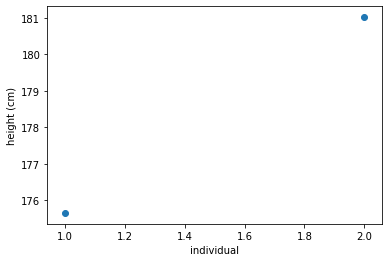

In [7]:
# TRY OUT : Draw a sample of size N and plot the heights. 
#Repeat several times with different N.

N=2
x=np.arange(1,N+1)
nscores=np.random.normal(178.4,7.59,N)

plt.scatter(x,nscores)
plt.xlabel('individual')
plt.ylabel('height (cm)')
plt.show()

In real studies the random sampling is typically much easier said than done. Therefore, HOW you recruit test participants is something that should be carefully considered so that you do not end up with bias and unreliable data.

<a id= 'Summarizing'> </a>


## 5.2 Summarizing data

Once we have our sample, we first want to collect, classify, summarize and present the data so we can interpret it. This is what we use descriptive statistics for.

### 5.2.1 Central tendency

The ways to summarize data differ depending on measurement scales used and how the data collected looks. 

The *mean value* is a measure of central tendencies that is based on ALL values (or scores) and one can think of it as a kind of "balancing point". The arithmetic mean of a sample can be calculated as

$$\bar{X} =\frac {\sum_i^N{ X_i}} {N} $$

where $X_i$ is each individual score (that is $X_1, X_2, ..., X_N$)


The *median*, on the other hand, is less sensitive to extreme values. The median is the point below which half of the (numerically ordered) scores fall and is also called the 50th percentile 

The *mode* is simply the most commonly occuring score in the data, and therefore a score always present in the data. This is used mostly for categorical (nominal) data.

### Try out 2: 
Calculate different measures of central tendency by hand for 
A=[1, 1, 2, 3, 3, 3, 3, 4]

In [6]:
#TRY OUT 2: calculate different measures of central tendency by hand for 

A=[1, 1, 2, 3, 3, 3, 3, 4]

#Then check with the following functions

#stats.mode()
#np.median()
#np.mean()

### Try out 3: 
what will be the answer for this call?

In [5]:
# TRY OUT: what will be the answer for this call?

#stats.mode(["red", "blue", "blue", "red", "green", "red", "red"])


<a id= 'variability'> </a>


### 5.2.2. Variability

Only reporting mean values typically do not tell much about the true
nature of the data without information also about the *variability* or
*spread* in it. The simplest way of reporting the variability is giving
the range of the data, that is the smallest and largest value. However,
variance and standard deviation is more helpful to get an idea of the
variability and where most values are found.


VARIANCE is the sum of the squared difference between each individual
score and the mean, all divided by the number of scores

$$\sigma^2  =\frac{\sum_i^N{ (X_i-\bar{X}})^2 } {N}$$ 

where $X_i$ is each
individual value and $\bar{X}$ is the
arithmetic mean.


STANDARD DEVIATION is simply the square root of the variance
$$\sigma  =\sqrt {\sigma^2}$$

The standard deviation can be thought of as a measure of distance from
the mean. Assuming that data is normally distributed, most of the scores can be found within this distance (68.27% of them to be more precise).

What you see above refers to the true variance and the true standard deviation of the population. For SAMPLE variance and standard deviation the denominator is adjusted by reducing N with 1. You can think of it as reducing the risk of under-estimating the variance for small sample sizes.

### Try out 4: 
Which of the following function calls are calculating the sample mean?

In [11]:
#TRY OUT 4: which of the following function calls are calculating the sample mean?  look up ddof in 

a=np.arange(1,4)
#compare the following:
np.std(a)
np.std(a, ddof=1)

#TIP: use help(np.std)

1.0

<a id= 'Distributions'> </a>

## 5.3. Frequency Distributions

The central tendency and spread of the data are summarizing some characteristics, but to get a better overview we would like to know about the *distribution* of data points. Histograms will tell us about the shape of the distribution. There are a few shapes that can be expected to occur in different kinds of data: normal distributions (bell shaped and symmetrical), skewed distributions (one tail longer than the other), uniform distributions (flat), and bimodal (two main peaks).



### Try out 5: 
Plot the histogram and determine what type of distribution this is 

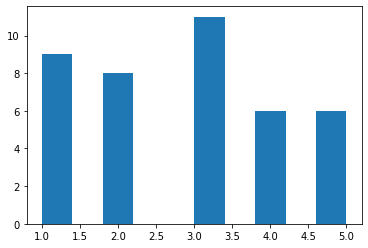

In [24]:
#TRY OUT 5: Plot the histogram and determine what type of distribution this is 

scores=np.random.randint(1,6,40)
plt.hist(scores)
plt.show()

#TIP: check help(np.random) and/or increase the number of samples drawn

### 5.3.1 Normal distribution


The normal, or gaussian, distribution is so commonly occuring that it gave it its name. A lot of different biological processes give rise to normally distributed data. 

The distribution is described by the function

$$ y(x) =\frac{1}{\sigma \sqrt{2 \pi}} e^-{\frac{(x-\mu)^2}{2\sigma^2}}$$ 

where $\sigma$ is the standard devaiation and $\mu$ is the
arithmetic mean. Since normal distributions are perfectly symmetrical, the mean, median and mode are the same. Note that we here use the *Greek* letters to denote the TRUE mean and standard deviations of the population.

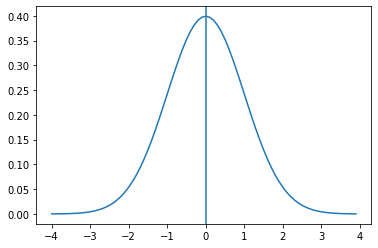

In [4]:
#plot a standard normal distribution where sigma=1 and mu=0

#generate an x-vector
x = np.arange(-4, 4, 0.1)

sigma1=1
mu1=0

#calculate a normal distribution of x with a mean of 0 
y1 =1/(sigma1* np.sqrt(2*np.pi))*np.exp(-((x-mu1)**2)/(2 * sigma1**2))

plt.plot(x,y1)

plt.axvline(mu1, 0, 1) #plots the mean value as vertical line
plt.show()

### Try out 6: (Typical exam question)
Plot the normal distribution with different mean and std. What changes in the plot?

In [23]:
#TRY OUT: Copy and modify the code above to plot the normal distribution with different mean and std.
# What changes in the plot?


In a normal distribution, the majority of scores lie around the centre (main peak) of the distribution. The width of the bell says something about the variability of data, how well centered it is around its mean value. In fact, as seen in the equation above, the width is linked to the standard deviation. 68.26 % of all values can be found in the region $\mu \pm \sigma$. If we increase the range to $\mu \pm 2\sigma$ we have almost ALL values, 96.44%.

An example of normally distributed data can be seen in heights: 
https://ourworldindata.org/human-height#height-is-normally-distributed


We can simulate drawing a sample measuring heights

### Try out 7: 
What is the mean and the standard deviation for this distribution?

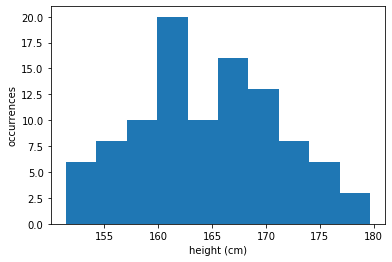

In [43]:
#What is the mean and the standard deviation for this distribution
N=100 #variable for sample size
sampleheights=np.random.normal(164,7,N)

plt.hist(sampleheights)
plt.ylabel('occurrences')
plt.xlabel('height (cm)')
plt.show()

### Try out 8: 
Go to the link on human heights above and change the values so that they correspond to samples of the opposite sex

In [40]:
#TRY OUT: Go to the link on human heights above 
# and change the values so that they correspond to samples of the opposite sex



<a id= 'SampleMeanSize'> </a>

## 5.4. Sample mean and sample size

We draw samples because it is impractical (or impossible) to measure all individuals in the whole population. We therefore need also to consider how large a sample is needed for our sample mean $\bar{X_i}$ to be a good estimate of the true population mean $\mu$. 
As our sample size N increases it will start to approach the whole population, so the immediate answer is the larger the better. The reason for this we can see in the variability of sample means.


### Try out 9: 
Draw different samples, each with a sample size N. Then extend to add means for all samples and plot the histogram of the resulting scores. 

Compare to the true mean of the population. 

Repeat for different Ns.

In [50]:
# TRY OUT: draw different samples, each with a sample size N. 

N=5 #variable for sample size
sample1=np.random.normal(164,7,N)
sample2=np.random.normal(164,7,N)
sample3=np.random.normal(164,7,N)
sample4=np.random.normal(164,7,N)
sample5=np.random.normal(164,7,N)

# extend this to add means for all samples
allmeans= [np.mean(sample1), np.mean(sample2)]

#Plot the histogram of the resulting scores.

#compare to the true mean of the population

#Repeat for different Ns

<a id= 'StandardError'> </a>

## 5.5. Standard Error of the Mean

The estimate of the true population mean vary with each sample. As we collect more and more samples it becomes clear that also the sample means have a distribution with some variability. If the sample size N is large enough, most sample means will be close to the true population mean. That is the standard deviation of the distribution is small.
The standard deviation of the distribution of sample means is called *standard error of the mean* and it gives a number of how precise our estimation of the true mean is. 


Standard error= 6.490706514631138
Standard error= 4.283950161344802
Standard error= 3.684718345701109
Standard error= 2.6351524188402937
Standard error= 2.0256580482198716


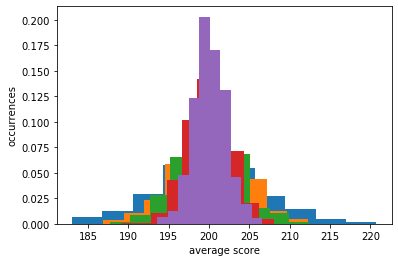

In [6]:
#The effect of sample size on standard error of the mean can be seen 
# by drawing K samples, each of size N, calculating sample means and plot them. 

K=1000 #how many samples
N=[10, 20, 30, 50, 100] #sample sizes

meanarr=np.zeros(K, float)

for i in range(0,len(N)):
    for j in range(0,K):
       score=np.random.normal(200,20,N[i]) #generate vector with scores
       meanarr[j]=score.mean()# calculate the means for K=j and sample of size 
    count, bins, ignored =plt.hist(meanarr, density=True) #plot histogram with K means
    print('Standard error=', meanarr.std()) #print the standard error for each N
plt.ylabel('occurrences')
plt.xlabel('average score')
plt.show()

### Try out 10: 
Change the number of samples drawn K and see how the distribution changes

In [59]:
# TRY OUT: Change the number of samples drawn K and see how the distribution changes



### Try out 11: 
Add additional sample sizes for N and see the effect of the standard error

In [ ]:
# TRY OUT: Add additional sample sizes for N and see the effect of the standard error